# Data overview

In [1]:
import os
import sys
from importlib import reload
sys.path.append('../src')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

### Read 

In [2]:
%%time
train = pd.read_csv('../input/jigsaw-toxic-comment-train.csv', usecols=[0,1,2])
len(train)

CPU times: user 1.16 s, sys: 0 ns, total: 1.16 s
Wall time: 1.21 s


223549

In [210]:
lens = train.comment_text.apply(len) 
np.sum(lens[lens<512])

32481675

In [35]:
%%time
train_ub = pd.read_csv('../input/jigsaw-unintended-bias-train.csv')
len(train_ub)

CPU times: user 14 s, sys: 1.96 s, total: 16 s
Wall time: 16 s


1902194

In [3]:
%%time
validation = pd.read_csv('../input/validation.csv')
len(validation)

CPU times: user 85 ms, sys: 0 ns, total: 85 ms
Wall time: 113 ms


8000

In [19]:
%%time
test = pd.read_csv('../input/test.csv')
len(test)

CPU times: user 461 ms, sys: 0 ns, total: 461 ms
Wall time: 513 ms


63812

Threshold toxicity in unintended bias dataset

In [48]:
train_ub = train_ub.iloc[:,:8]
train_ub.toxic = np.array(train_ub.toxic > 0.5, dtype=np.uint8)

Dummy column for convenience

In [93]:
test['toxic'] = 0

Preview

In [12]:
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [49]:
train_ub.head(3)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat
0,59848,"This is so cool. It's like, 'would you want yo...",0,0.0,0.0,0.0,0.0,0.0
1,59849,Thank you!! This would make my life a lot less...,0,0.0,0.0,0.0,0.0,0.0
2,59852,This is such an urgent design problem; kudos t...,0,0.0,0.0,0.0,0.0,0.0


In [13]:
validation.head(3)

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1


In [14]:
test.head(3)

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it


### Language distribution in validation and test

In the training set we have only English.

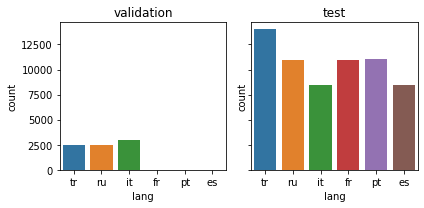

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(6,3), sharex=True, sharey=True)

for i, (name, ax) in enumerate(zip(['validation', 'test'], axes)):
    sns.countplot(eval(name).lang, ax=ax)
    ax.set_title(name)
    
plt.tight_layout()
plt.show()

### Class (im)balance

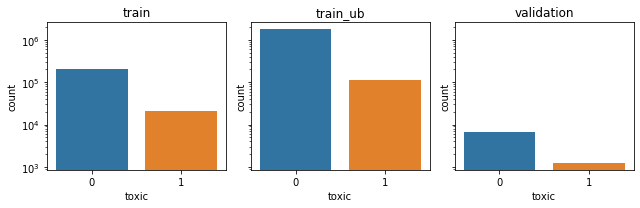

In [52]:
fig, axes = plt.subplots(ncols=3, figsize=(9,3), sharex=True, sharey=True)

for i, (name, ax) in enumerate(zip(['train', 'train_ub', 'validation'], axes)):
    sns.countplot(eval(name).toxic, ax=ax, log=True)
    ax.set_title(name)

plt.tight_layout()
plt.show()

### Sentence length

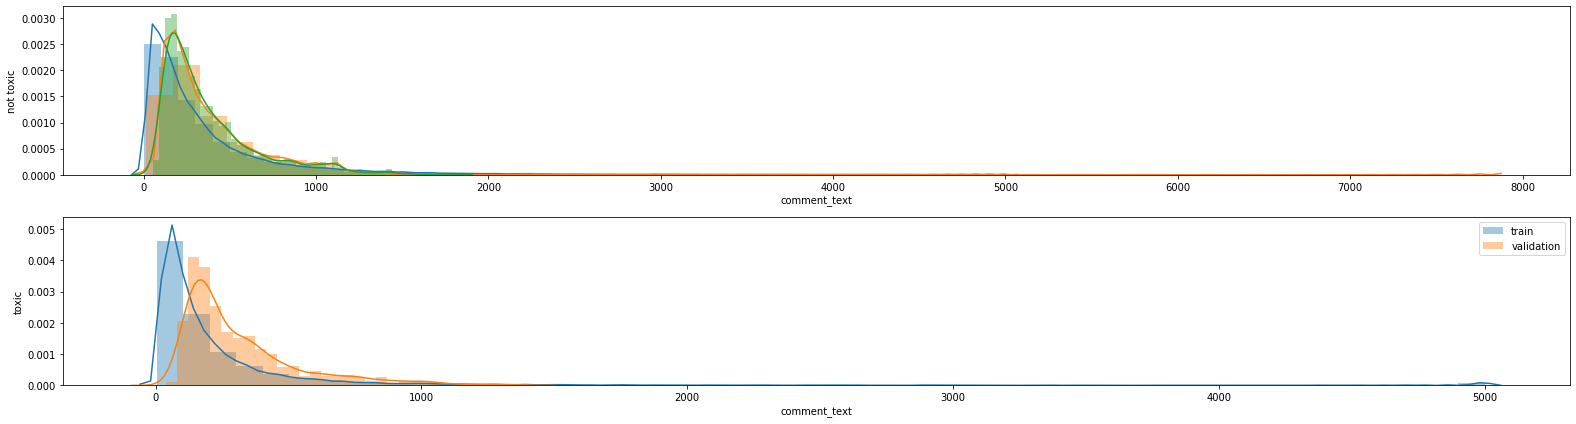

In [102]:
fig, ax = plt.subplots(nrows=2, figsize=(22,6))
for label in ['train', 'test', 'validation']:
    for toxic in [0, 1]:
        try:
            sns.distplot(eval(label)[eval(label).toxic == toxic].comment_text.apply(len), ax=ax[toxic], label=label)
        except AttributeError:
            if toxic == 0:
                sns.distplot(eval(label)[eval(label).toxic == toxic].content.apply(len), ax=ax[toxic], label=label)

ax[0].set_ylabel('not toxic')
ax[1].set_ylabel('toxic')
plt.legend()
plt.tight_layout()
plt.show()

### Cleaning

In [165]:
import preprocessing
reload(preprocessing)

[nltk_data] Downloading package punkt to
[nltk_data]     /gpfs/hpc/home/papkov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'preprocessing' from '../src/preprocessing.py'>

Check if full duplicates exist

In [86]:
len(train), len(train.comment_text.unique())

(223549, 223549)

talk 06:46, 2005 Feb 7 (UTC)

In [188]:
train.comment_text[4508]

'"\n\n My reply that you have deleted in a fascist manner from the Nicosia Discussion page....l \n\nNicosia and discrimination against Greek contributors and the Greek character of the cityDear Salvio,\n\nYou have accused me of abusive behaviour against other users and consequently blocked me from editing the article on Nicosia for a 24 hour period.\n\nMay I draw to your attention that it is fairly obvious that those three users namely Seb az86556 , Seric2 and Chesdovi are clearly constantly creating a picture of Nicosia as a decadent muslim city that serves their religious beliefs and are all clearly hailing form Turkish backgrounds.\n\nThere is a constant undermining of the city´s Greek identity i.e. whenever a Greek flag appears in any single picture the aforementioned users delete that picture instantaneously and prefer to throw in pictures of the flag of ""shame"" and occupation that is equivalent to a legalisation of a human crime of continuous brutal occupation of the island of 

In [190]:
%%time
preprocessing.clean_text(train.comment_text[4508])

CPU times: user 3.67 ms, sys: 0 ns, total: 3.67 ms
Wall time: 3.45 ms


'My reply that you have deleted in a fascist manner from the Nicosia Discussion page....l Nicosia and discrimination against Greek contributors and the Greek character of the cityDear Salvio, You have accused me of abusive behaviour against other users and consequently blocked me from editing the article on Nicosia for a hour period. May I draw to your attention that it is fairly obvious that those three users namely Seb az , Seric and Chesdovi are clearly constantly creating a picture of Nicosia as a decadent muslim city that serves their religious beliefs and are all clearly hailing form Turkish backgrounds. There is a constant undermining of the city´s Greek identity i.e. whenever a Greek flag appears in any single picture the aforementioned users delete that picture instantaneously and prefer to throw in pictures of the flag of shame and occupation that is equivalent to a legalisation of a human crime of continuous brutal occupation of the island of Cyprus by the Turkish army. The 

### Tokenization

In [183]:
import preprocessing
reload(preprocessing)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to
[nltk_data]     /gpfs/hpc/home/papkov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'preprocessing' from '../src/preprocessing.py'>

In [ ]:
preprocessing.read_tok_save_all_roberta()

Processing jigsaw-toxic-comment-train.csv
Saving to ../input/jigsaw-toxic-comment-train.npz dict with dict_keys(['x', 'y', 'attention_mask'])
Finished in 165.2350676059723 s

Processing jigsaw-unintended-bias-train.csv


### Comment length thresholding

In [33]:
train[train.apply(lambda x: (len(x['comment_text']) < 50) and (x['toxic'] == 0), axis=1)]

,id,comment_text,toxic
17,000897889268bc93,REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski,0
62,0023daf96917e0d0,REDIRECT Talk:Frank Herbert Mason,0
87,0036e50f42d0b679,"Oh, it's me vandalising?xD See here. Greetings,",0
89,0037fe4f8f5cdcfb,Thanks reading there now !,0
138,0057e30091cf3e81,"""\n\n A cookie for you! \n\n A cookie for you...",0
...,...,...,...
223492,ffc5938fa5c52f80,so i just reply that he is a sockpuppet himself,0
223506,ffd49b8defd069d0,""" \n ::Well, now don't I feel stupid.... · """,0
223519,ffe05a286c1ccdf4,""" \n\n == Thanks == \n\n ...for this. I forgot...",0
223521,ffe319146de940d2,"The Yatt got me, this is insane",0


In [12]:
validation.comment_text.apply(len).min()

39

In [21]:
test.content.apply(len).min()

15

In [13]:
validation[validation.comment_text.apply(lambda x: len(x) < 40)]

,id,comment_text,lang,toxic
6950,6950,V A I A L A V O R A R E T E R R O N E !,it,1


In [26]:
test[test.content.apply(lambda x: len(x) < 50)]

,id,content,lang
2819,2819,Прошу восстановить статью Готово. !,ru
5833,5833,Assim: jic Até mais e obrigado pelo alerta jic,pt
9069,9069,siktir lan amq,tr
14415,14415,", tu mismo lo corregiste el 3 mar 2011. Antón",es
18092,18092,niker vos mere,fr
22906,22906,Leandro Martinez msg Leandro Martinez msg,pt
24698,24698,¿Y ? ¿Quién eres y por qué me dices esto? Bang,es
26726,26726,9 9 9 I m po r t a n t is s i m o u rg en t e,it
34578,34578,Marcos discussão . Marcos discussão .,pt
44024,44024,É por isso que eu mato a cobra e mostro o pau,pt


In [17]:
validation[validation.comment_text.str.find('terrone') != -1]

,id,comment_text,lang,toxic
1529,1529,"Beh, scemo , prendere per il culo , malafed...",it,1
3214,3214,Al di là di quello di cui state discutendo (e ...,it,0
5421,5421,"Allora, caro, il tuo essere terrone come vedi ...",it,1


In [22]:
test[test.content.str.find('terrone') != -1]

,id,content,lang
1526,1526,"come immaginavo,,,sei solo un vecchio di merda...",it
8198,8198,______________________________________________...,it
28870,28870,"Ero fisicamente assente (al lavoro a Parigi, c...",it
32090,32090,Cosa stai scrivendo? Anche Walsch è dispregiat...,it
35504,35504,sono un terrone napoletano mangia immondizie e...,it
